In [78]:
import numpy as np
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras
import plotly.graph_objects as go
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

In [79]:
df=pd.read_csv(r'C:\Users\santh\Downloads\Datasets\StackOverflow.csv')

In [80]:
df.head(5)

,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
0,09-Jan,0,0,0,631,8,6,2,19,8,...,0,1,0,0,5,0,0,5,0,0
1,09-Feb,1,0,0,633,9,7,3,27,4,...,0,0,0,0,5,0,0,11,0,0
2,09-Mar,0,0,0,766,4,4,2,24,3,...,0,0,0,0,7,0,0,2,0,0
3,09-Apr,0,0,0,768,12,6,3,32,10,...,0,0,0,0,11,0,0,5,0,0
4,09-May,1,0,0,1003,2,7,2,42,7,...,0,0,0,0,10,0,0,3,0,0


In [81]:
df.shape

(132, 82)

In [82]:
df.describe()

,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,pandas,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,42.704545,11.848485,25.537879,9856.704545,2411.856061,514.204545,112.454545,651.681818,264.401515,980.295455,...,0.128788,21.643939,0.022727,22.522727,92.386364,0.325758,1.507576,31.931818,15.560606,12.984848
std,29.024533,21.066773,22.821045,6221.071304,1714.759241,392.882978,69.680773,395.949633,249.655453,1148.018331,...,0.378936,18.749507,0.194030,19.393265,47.025030,1.037438,3.185119,16.307725,19.942765,12.420732
min,0.000000,0.000000,0.000000,631.000000,2.000000,4.000000,2.000000,19.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,16.750000,0.000000,5.750000,3744.250000,608.750000,119.000000,39.750000,363.500000,54.000000,1.750000,...,0.000000,2.000000,0.000000,5.750000,58.500000,0.000000,0.000000,21.750000,0.000000,0.000000
50%,44.500000,0.000000,17.500000,9651.500000,2613.500000,486.000000,130.500000,581.000000,154.500000,483.000000,...,0.000000,22.000000,0.000000,17.000000,98.000000,0.000000,0.000000,31.000000,3.000000,11.000000
75%,66.500000,15.000000,46.000000,15590.750000,4000.500000,901.500000,171.250000,997.750000,495.250000,1860.750000,...,0.000000,38.000000,0.000000,38.000000,124.000000,0.000000,1.250000,44.000000,28.250000,21.250000
max,106.000000,79.000000,79.000000,23602.000000,5138.000000,1310.000000,229.000000,1535.000000,983.000000,4098.000000,...,2.000000,72.000000,2.000000,77.000000,196.000000,6.000000,14.000000,73.000000,75.000000,48.000000


In [83]:
df.isnull().sum().any()

True

In [84]:
df.isnull().sum()

month                    0
nltk                     0
spacy                    0
stanford-nlp             0
python                   0
                        ..
Nolearn                  0
Lasagne                  0
OCR                      0
Apache-spark-mlib        0
azure-virtual-machine    0
Length: 82, dtype: int64

In [85]:
df.Tableau.mode

<bound method Series.mode of 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
127    NaN
128    NaN
129    NaN
130    NaN
131    NaN
Name: Tableau, Length: 132, dtype: float64>

In [86]:
df["Tableau"].fillna(value=df["Tableau"].mean(),inplace = True)

In [87]:
df[['year','months']] = df.month.str.split("-",expand=True)
print(df['year'], df['months'])

0      09
1      09
2      09
3      09
4      09
       ..
127    19
128    19
129    19
130    19
131    19
Name: year, Length: 132, dtype: object 0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
127    Aug
128    Sep
129    Oct
130    Nov
131    Dec
Name: months, Length: 132, dtype: object


In [88]:
df.head(5)


,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,...,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine,year,months
0,09-Jan,0,0,0,631,8,6,2,19,8,...,0,0,5,0,0,5,0,0,09,Jan
1,09-Feb,1,0,0,633,9,7,3,27,4,...,0,0,5,0,0,11,0,0,09,Feb
2,09-Mar,0,0,0,766,4,4,2,24,3,...,0,0,7,0,0,2,0,0,09,Mar
3,09-Apr,0,0,0,768,12,6,3,32,10,...,0,0,11,0,0,5,0,0,09,Apr
4,09-May,1,0,0,1003,2,7,2,42,7,...,0,0,10,0,0,3,0,0,09,May


In [89]:
included =  df.drop(columns=["month","year","months"])
print(included.head())

   nltk  spacy  stanford-nlp  python   r  numpy  scipy  matlab  \
0     0      0             0     631   8      6      2      19   
1     1      0             0     633   9      7      3      27   
2     0      0             0     766   4      4      2      24   
3     0      0             0     768  12      6      3      32   
4     1      0             0    1003   2      7      2      42   

   machine-learning  pandas  ...  Plato  Sympy  Flair  stanford-nlp.1  pyqt  \
0                 8       0  ...      0      1      0               0     5   
1                 4       0  ...      0      0      0               0     5   
2                 3       0  ...      0      0      0               0     7   
3                10       0  ...      0      0      0               0    11   
4                 7       0  ...      0      0      0               0    10   

   Nolearn  Lasagne  OCR  Apache-spark-mlib  azure-virtual-machine  
0        0        0    5                  0                

In [90]:

question_count  = included.sum(axis = 0)
top_keys = question_count.sort_values(ascending = False)[0:11]
print(list(top_keys))

[1301085.0, 318365.0, 195126.0, 129399.0, 86022.0, 85972.0, 83524.0, 67875.0, 54758.0, 53019.0, 47664.0]


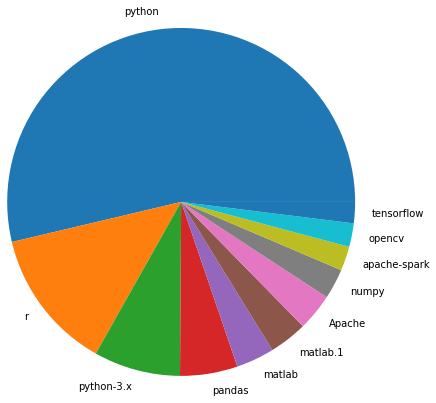

In [91]:

plt.pie(top_keys, labels = top_keys.index, radius=2) 
plt.show()

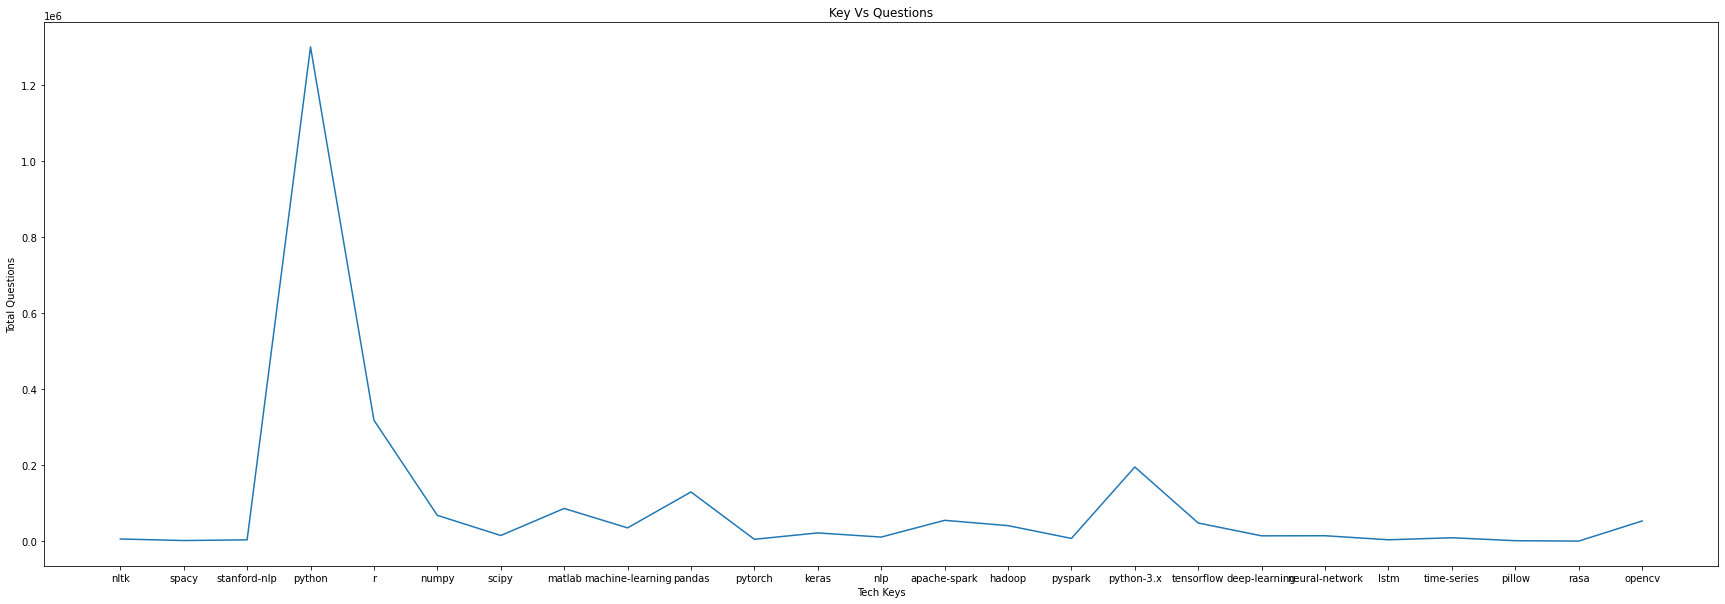

In [92]:


fig = plt.figure(figsize = (30, 10))
plt.plot(included.columns[0:25],question_count[0:25]) 
  
plt.xlabel("Tech Keys") 
plt.ylabel("Total Questions") 
plt.title("Key Vs Questions") 
plt.show() 


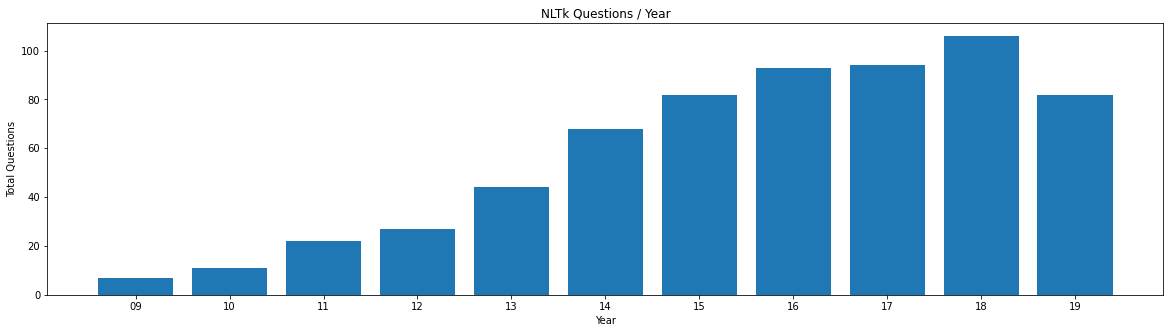

In [93]:

fig = plt.figure(figsize = (20, 5))
plt.bar(df["year"],df["nltk"]) 
  
plt.xlabel("Year") 
plt.ylabel("Total Questions") 
plt.title("NLTk Questions / Year") 
plt.show() 

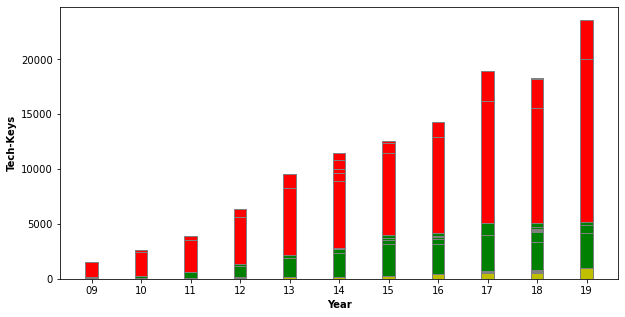

In [94]:

barWidth = 0.25
fig = plt.subplots(figsize =(10, 5)) 

plt.bar(df["year"] , df["python"], color ='r', width = barWidth, edgecolor ='grey', label ='Python')
plt.bar(df["year"], df["r"], color = 'g', width = barWidth, edgecolor ='grey', label ='R') 
plt.bar(df["year"], df["machine-learning"], color ='y', width = barWidth, edgecolor ='grey', label ='ML') 
   
# Adding Xticks  
plt.xlabel('Year', fontweight ='bold') 
plt.ylabel('Tech-Keys', fontweight ='bold') 

plt.show() 

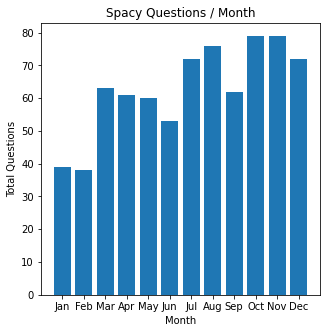

In [95]:

fig = plt.figure(figsize = (5, 5))
plt.bar(df["months"],df["spacy"]) 
  
plt.xlabel("Month") 
plt.ylabel("Total Questions") 
plt.title("Spacy Questions / Month") 
plt.show() 

### Heatmap

<AxesSubplot:>

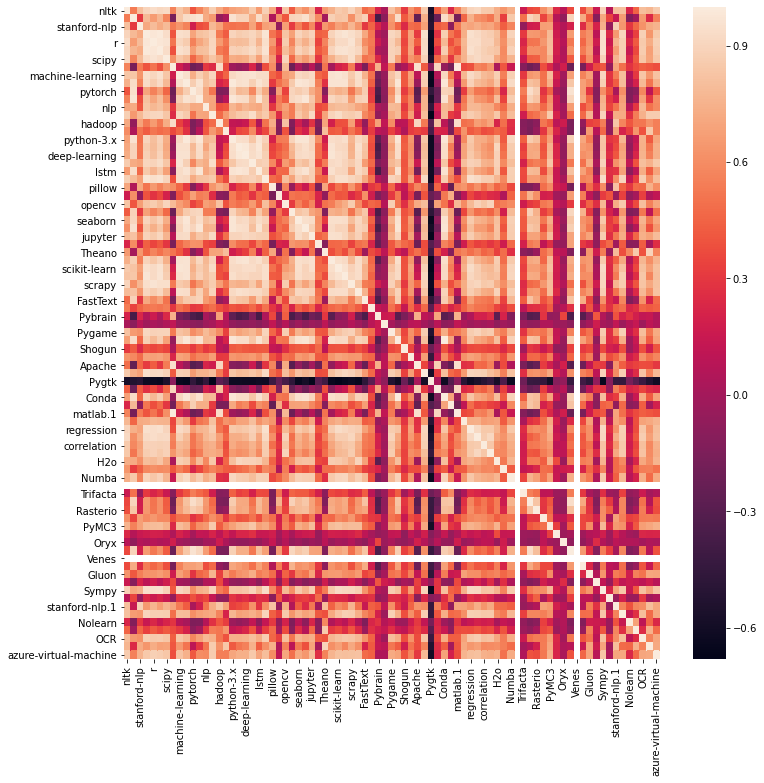

In [96]:
import seaborn as sns
correlation = df.corr()
plt.figure(figsize = (12 , 12))
sns.heatmap(correlation)

#### Lambda Function

In [97]:

df['year'] = df['year'].apply( lambda x : int('20'+x))
print(df['year'])

0      2009
1      2009
2      2009
3      2009
4      2009
       ... 
127    2019
128    2019
129    2019
130    2019
131    2019
Name: year, Length: 132, dtype: int64


In [98]:
tech = df.groupby(['year']).sum()
print(tech)
a = tech.index
tech['year'] = a
print(tech)

      nltk  spacy  stanford-nlp  python      r  numpy  scipy  matlab  \
year                                                                   
2009    16      0             7   12862    524    159     51     599   
2010    62      0            25   27038   2266    522    201    1822   
2011   172      0            53   42228   5838   1197    375    3934   
2012   246      0           109   64302  12195   2358    841    7268   
2013   419      0           177   96575  22284   4392   1343   11712   
2014   558      0           266  116649  30945   5845   1574   14118   
2015   706      3           643  137537  40757   7101   1797   13928   
2016   876     69           551  159111  44549   9232   2035   11643   
2017   965    267           570  200147  53476  12076   2295    9978   
2018   864    480           745  206300  52261  11781   2223    5999   
2019   753    745           225  238336  53270  13212   2109    5021   

      machine-learning  pandas  ...  Plato  Sympy  Flair  stanf

In [99]:
x = tech[['year']]
print(x)


      year
year      
2009  2009
2010  2010
2011  2011
2012  2012
2013  2013
2014  2014
2015  2015
2016  2016
2017  2017
2018  2018
2019  2019


In [100]:
y = tech[['nltk']]
print(y)

      nltk
year      
2009    16
2010    62
2011   172
2012   246
2013   419
2014   558
2015   706
2016   876
2017   965
2018   864
2019   753


In [101]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2)

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print(y_pred)
print(y_pred.shape)

[850.06 854.98  94.6 ]
(3,)


C:\Users\santh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [103]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

79.8933333333333